In [3]:
from __future__ import division
from __future__ import print_function
import numpy as np
import scipy.sparse as ssp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

In [4]:
class FiberNetwork:
    def __init__(self,Nx,Ny):
        self.Nx = Nx
        self.Ny = Ny
        self.N = Nx*Ny
        self.nrows = self.N - 2*self.Nx
        self.adjmat = ssp.lil_matrix((self.N,self.N), dtype=np.int32)
        self.V = np.zeros(self.N, dtype=np.float64)
        self.V[:Nx] = 1 
    def adj_todense(self):
        return self.adjmat.todense()
    def lap_todense(self):
        return self.lapmat.todense()
    def get_east_neighbour(self,node):
        return (node//self.Nx)*self.Nx + (node+1)%self.Nx
    def get_south_neighbour(self,node):
        return (node+self.Nx)%self.N
    def add_link(self,node1,node2):
        self.adjmat[node1,node2] = 1
        self.adjmat[node2,node1] = 1
    def build_fiber_network_w_bus(self):
        for node in range(self.Nx, self.N-self.Nx):
            self.add_link(node,self.get_east_neighbour(node))
        for node in range(self.N-self.Nx):
            self.add_link(node,self.get_south_neighbour(node))
    def get_neighbors(self,node):
        return self.adjmat.rows[node]
    def lapmat(self):
        lapmat = ssp.lil_matrix((self.nrows,self.nrows), dtype=np.float64)
        for node in range(self.Nx, self.N-self.Nx):
            i = node - self.Nx
            neighbors = self.get_neighbors(node)
            degree = len(neighbors)
            lapmat[i,i] = degree
            for nn in neighbors:
                if(nn>=self.Nx and nn<self.N-self.Nx):
                    j = nn - self.Nx
                    lapmat[i,j] = -1 
        return lapmat.tocsr()
    def rhs(self):
        rhs = np.zeros(self.nrows, dtype=np.float64)
        for node in range(self.Nx, 2*self.Nx):
            neighbors = self.get_neighbors(node)
            if node-self.Nx in neighbors:
                rhs[node-self.Nx] = self.V[node-self.Nx]
        return rhs
    def update_potentials(self,x):
        self.V[self.Nx:self.N-self.Nx] = x
    def remove_fiber_between_nodes(self,node1,node2):
        self.adjmat[node1,node2] = 0
        self.adjmat[node2,node1] = 0
    def plot_potentials(self):
        side = self.Nx
        matrixV = self.V.reshape((side,side))
        plt.matshow(matrixV)
    def plot_network(self):
        f, ax = plt.subplots()
        ax.set_aspect('equal')
        elements = self.adjmat.nonzero()
        for i,j in zip(elements[0],elements[1]):
            if i<j:
                xi, xj = i%self.Nx, j%self.Nx
                yi, yj = i//self.Nx, j//self.Nx
                if j-i==self.Nx-1:
                    xi = xj+1
                ax.plot([xi,xj],[yi,yj],'k-')
    def plot_currents(self):
        f, ax = plt.subplots()
        ax.set_aspect('equal')
        elements = self.adjmat.nonzero()
        for i,j in zip(elements[0],elements[1]):
            if i<j:
                xi, xj = i%self.Nx, j%self.Nx
                yi, yj = i//self.Nx, j//self.Nx
                current = np.abs(self.V[i]-self.V[j])
                if j-i==self.Nx-1:
                    xi = xj+1
                ax.plot([xi,xj],[yi,yj],'k-',lw=20*current)
    def global_current(self):
        globcurrent = 0.
        for i in range(self.Nx):
            current = np.abs(self.V[i]-self.V[i+self.Nx])
            globcurrent += current
        return globcurrent

a=0,  I= 1.052631578947382
a=1,  I= 1.0471069276397802
a=2,  I= 1.0375018632650965
a=3,  I= 1.0238083111977723
a=4,  I= 1.0061556933254212
a=5,  I= 0.9847336605192087
a=6,  I= 0.9597633410169697
a=7,  I= 0.9314801706137471
a=8,  I= 0.9001193246000948
a=9,  I= 0.8659013783211617


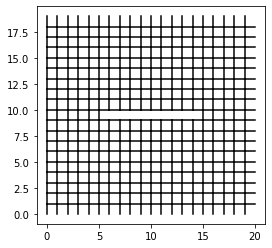

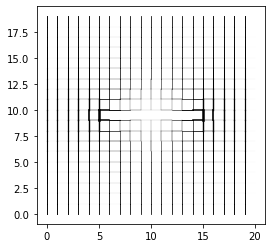

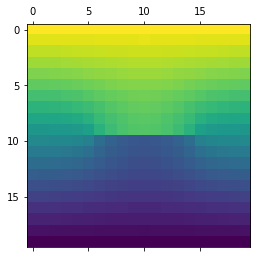

In [5]:
net = FiberNetwork(20,20)
net.build_fiber_network_w_bus()

x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=0,  I=',net.global_current())

net.remove_fiber_between_nodes(190,210)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=1,  I=',net.global_current())

net.remove_fiber_between_nodes(189,209)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=2,  I=',net.global_current())

net.remove_fiber_between_nodes(191,211)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=3,  I=',net.global_current())

net.remove_fiber_between_nodes(188,208)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=4,  I=',net.global_current())

net.remove_fiber_between_nodes(192,212)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=5,  I=',net.global_current())

net.remove_fiber_between_nodes(187,207)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=6,  I=',net.global_current())

net.remove_fiber_between_nodes(193,213)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=7,  I=',net.global_current())

net.remove_fiber_between_nodes(186,206)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=8,  I=',net.global_current())

net.remove_fiber_between_nodes(194,214)
x = spsolve(net.lapmat(), net.rhs())
net.update_potentials(x)
print('a=9,  I=',net.global_current())


net.plot_network()
net.plot_currents()
net.plot_potentials()
plt.show()